# N-Grams for Text Classification

In text classification, we can use n-grams as features for training a machine-learning model. A good use case of n-grams would be when classifying 
reviews as positive or negative sentiment. In such a situation, we can use bigrams (2-grams) or trigrams (3-grams) as features that can help the 
classifier identify phrases that convey sentiment more accurately. As such, we can use them over text representation techniques such as BoW, 
TF-IDF, or word embeddings because they require minimal preprocessing, which is advantageous when we have limited resources or time constraints.
If such constraints don’t exist, we can use them together with the text representation techniques to yield better outcomes during further analysis.

Reasons for choosing n-grams :

Interpretability: N-grams are human-readable because they represent word sequences, making it easier to understand which phrases or patterns influence
the classification decision. This is especially important when the transparency and interpretability of the model are essential.

Local context: N-grams capture immediate word relationships and local context within a short range. This is particularly useful when classification 
depends on short phrases or phrases nearby, such as sentiment analysis or spam detection.

Small dataset: When we have a small dataset, n-grams might perform better than complex techniques that require substantial training data. They can 
learn from smaller datasets because they capture straightforward patterns.

Baseline model: Starting with n-grams as a baseline approach to building a text classification model allows us to assess model performance and 
experiment with more complex techniques to see if they significantly improve.

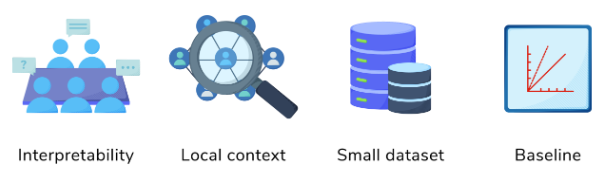


In [1]:
! pip install nltk

In [2]:
# a. install necessary libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.tokenize import word_tokenize
import string

In [3]:
# b. import the necessary dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/reviews_v1.csv')
df.head()

,text,label
0,This movie was fantastic! I couldn't stop watc...,positive
1,The food at this restaurant was delicious.,positive
2,I'm very unhappy with the customer service I r...,negative
3,The product exceeded my expectations.,positive
4,The delivery was late and the item was damaged.,negative


In [5]:
# c. define text preprocessing function ( punctuation and lower case )

def preprocess_text(text):
    text = text.lower()
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

In [9]:
# d. apply the function

df['text'] = df['text'].apply(preprocess_text)
df.head()

,text,label
0,this movie was fantastic i couldnt stop watching,positive
1,the food at this restaurant was delicious,positive
2,im very unhappy with the customer service i received,negative
3,the product exceeded my expectations,positive
4,the delivery was late and the item was damaged,negative


In [10]:
# e. segregate the dataframe into dependent and independent variables

X = df['text']
y = df['label']

In [13]:
# f. word tokenization of the text column

ngram_range = (1, 2) 
vectorizer = CountVectorizer(tokenizer=word_tokenize, ngram_range=ngram_range)
X_vectorized = vectorizer.fit_transform(X)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
# g. split the dataset into train and test set

X_train , X_test , y_train , y_test = train_test_split(X_vectorized , y , test_size=0.2 , random_state=42)

In [18]:
X_vectorized.get_shape()

(42, 469)

In [21]:
len(vectorizer.get_feature_names_out())

469

In [25]:
# h. instantiation and model building ( MultinomialNB())

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [26]:
# i. Predict on test data using the MultinomialNB() model

y_pred = classifier.predict(X_test)
print(y_pred)

['positive' 'negative' 'positive' 'negative' 'negative' 'positive'
 'neutral' 'negative' 'positive']


In [28]:
# performance of the classification model

confusion = confusion_matrix(y_test , y_pred)
accuracy = accuracy_score(y_test , y_pred)
print(confusion)
print(accuracy)


[[3 0 2]
 [0 1 0]
 [1 0 2]]
0.6666666666666666


In [30]:
pd.DataFrame(y_pred,y_test)

,0
label,
positive,positive
negative,negative
negative,positive
negative,negative
negative,negative
positive,positive
neutral,neutral
positive,negative
negative,positive
